<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/knn_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("Zoo.csv")

In [5]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

split the dataset

In [8]:
df = df.drop(["animal name"], axis= 1)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
X = df.drop('type',axis=1)
y = df[['type']]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 13)

In [11]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (80, 16)
Shape of X_test  :  (21, 16)
Shape of y_train :  (80, 1)
Shape of y_test  :  (21, 1)


scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

Grid search for choosing the best Value of K

In [14]:
# Get score for different values of n
k_list = np.arange(1, 21, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(21,1)
    score = cross_val_score(knn,X_train, y_train,cv= 10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [15]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [16]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


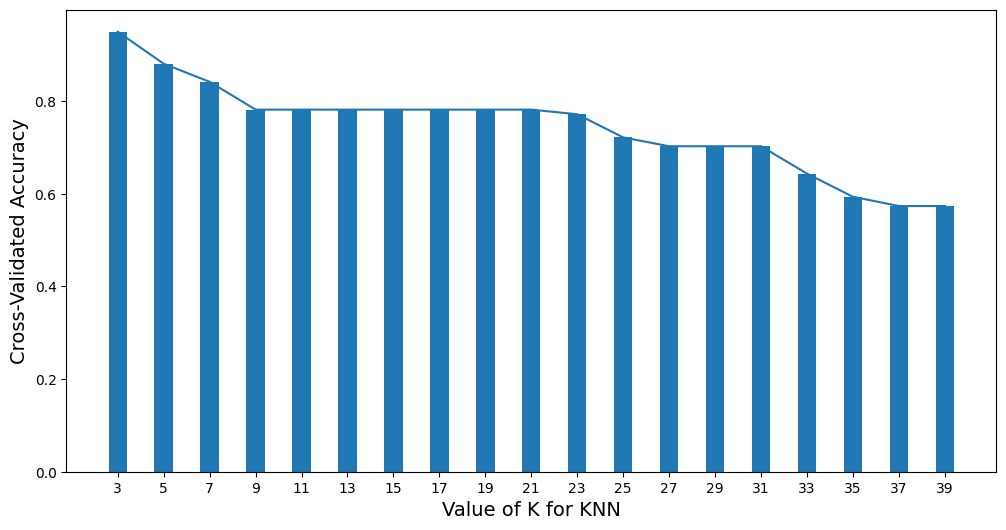

In [18]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())

plt.figure(figsize=(12,6))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 14)
plt.ylabel('Cross-Validated Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

In [19]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


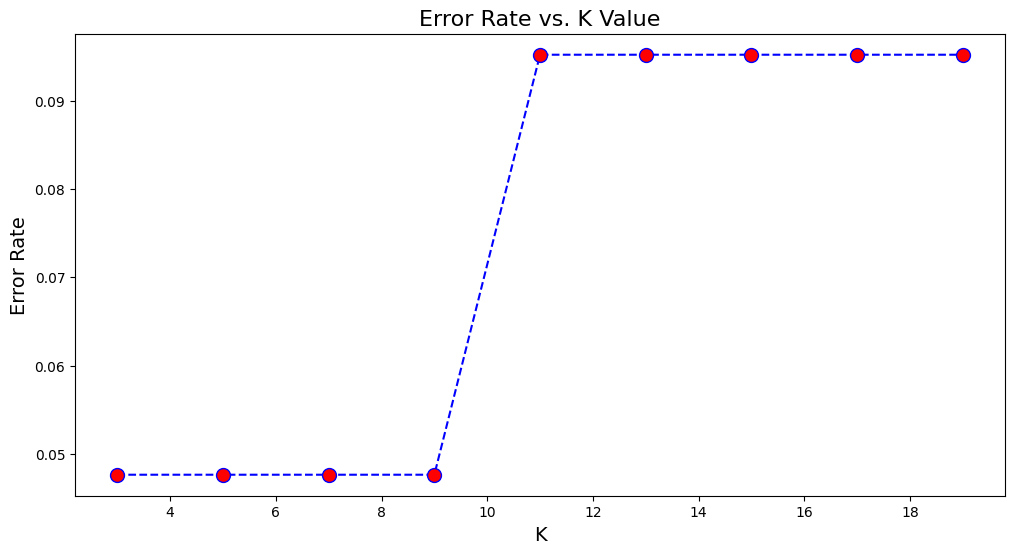

In [20]:
error_rate = []
k_range = [i for i in range(3,21,2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(21,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot([i for i in range(3,21,2)],error_rate,color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value',fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

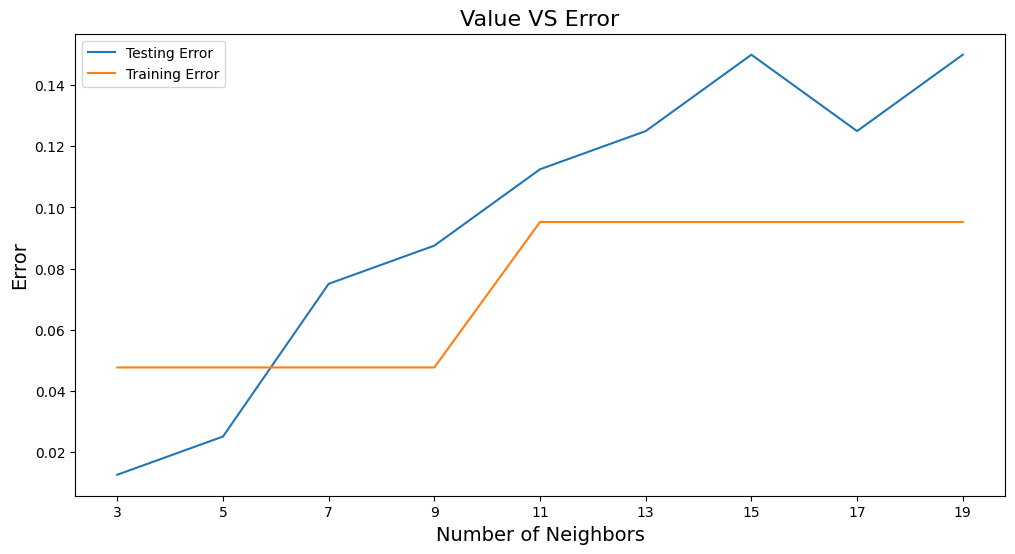

In [21]:
error1= []
error2= []
k_range = [i for i in range(3,21,2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    y_pred1 = y_pred1.reshape(80,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    y_pred2 = y_pred2.reshape(21,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[12,6])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('Value VS Error', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(k_range)
plt.show()

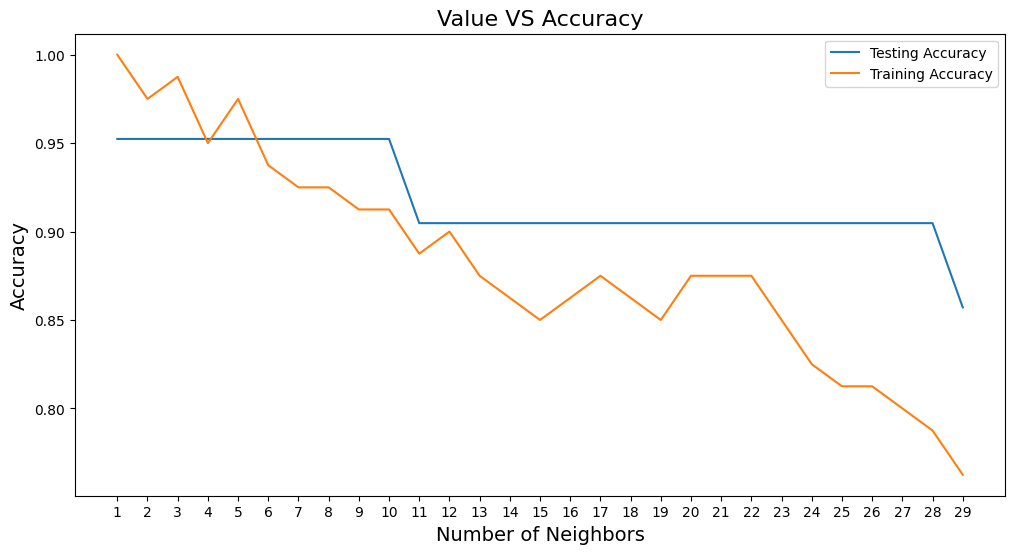

In [22]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize = 16)
plt.xlabel('Number of Neighbors',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)
plt.xticks(k_range)
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



In [25]:
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [26]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [27]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 1.0
Testing Accuracy  : 0.9523809523809523
